In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import joblib 
from joblib import dump,load

In [16]:
df=pd.read_csv("Admission_Predict.csv")
df.head()

,Serial_No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance_of_admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [17]:
print(df.shape)


# In[105]:


X=df[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']]
X


(900, 9)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
895,332,108,5,4.5,4.0,9.02,1
896,337,117,5,5.0,5.0,9.87,1
897,330,120,5,4.5,5.0,9.56,1
898,312,103,4,4.0,5.0,8.43,0


In [18]:
y=df['Chance_of_admit'].values


# In[107]:


X=np.asarray(X)
y=np.asarray(y)


In [19]:
X

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  , ...,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  , ...,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  , ...,   4.5 ,   9.04,   0.  ]])

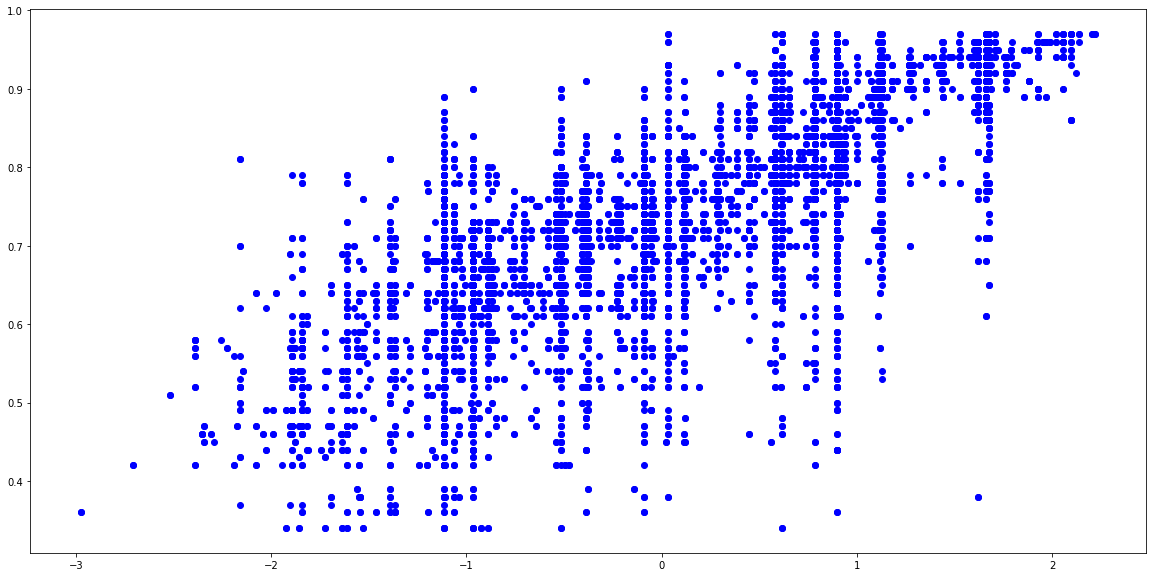

In [20]:
from sklearn import preprocessing
X=preprocessing.StandardScaler().fit(X).transform(X)
X[:2]


# In[112]:


plt.figure(figsize=(20,10))
plt.plot(X,y,'bo')
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()


# In[115]:


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)


In [22]:

LR=LR.fit(X_train,y_train)
y_testpred=LR.predict(X_test)


# In[118]:


from sklearn.metrics import mean_squared_error
print(np.sqrt(mean_squared_error(y_test,y_testpred)))

0.05705613828176329


In [23]:
print(LR.score(X_train,y_train))


0.8013966328550645


In [24]:
joblib.dump(LR, 'LR_model.pkl')


['LR_model.pkl']